# **Air Quality Index:  Regression Models**

Performed by:


1.   Rahul Mallya - PES1UG20CS318
2.   Rohit Roshan - PES1UG20CS355
3.   Rohith Reddy - PES1UG20CS354





# Importing csv file

# regression models

Splitting data into independent and dependent columns

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
dataset=pd.read_csv('/work/cleandata.csv',encoding="ISO-8859-1")

In [ ]:
X=dataset[['si','ni','rpi','spi']]
Y=dataset['AQI']
X.head()

,si,ni,rpi,spi
0,6.000,21.750,97.72853,166.840252
1,3.875,8.750,97.72853,166.840252
2,7.750,35.625,97.72853,166.840252
3,7.875,18.375,97.72853,166.840252
4,5.875,9.375,97.72853,166.840252


In [ ]:
X.nunique()

si     4229
ni     6895
rpi    6097
spi    6698
dtype: int64

In [ ]:
Y.nunique()

7279

## Linear Regression

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348588, 4) (87147, 4) (348588,) (87147,)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87147 entries, 336534 to 209440
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   si      87147 non-null  float64
 1   ni      87147 non-null  float64
 2   rpi     87147 non-null  float64
 3   spi     87147 non-null  float64
dtypes: float64(4)
memory usage: 3.3 MB


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
#map3=metrics.mean_poisson_deviance(Y_test,test_pred)
#print(map3)
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  9.931348706331937
RMSE TestData =  9.987837064206285
--------------------------------------------------
RSquared value on train: 0.9878669551405396
RSquared value on test: 0.9876883508017166


In [ ]:
"fig = plt.figure(figsize=(20,10))\n### Set figure size\nax = fig.add_subplot(111, projection='3d')\nax.scatter(X_test['si'],X_test['ni'],X_test['rpi'],c='red', marker='o', alpha=0.5)\nax.plot_surface(X_test,Y_test,model.reshape(X_test.shape), color='b', alpha=0.3)\nax.set_xlabel('Price')\nax.set_ylabel('AdSpends')\nax.set_zlabel('Sales')\nplt.show()"


"fig = plt.figure(figsize=(20,10))\n### Set figure size\nax = fig.add_subplot(111, projection='3d')\nax.scatter(X_test['si'],X_test['ni'],X_test['rpi'],c='red', marker='o', alpha=0.5)\nax.plot_surface(X_test,Y_test,model.reshape(X_test.shape), color='b', alpha=0.3)\nax.set_xlabel('Price')\nax.set_ylabel('AdSpends')\nax.set_zlabel('Sales')\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt

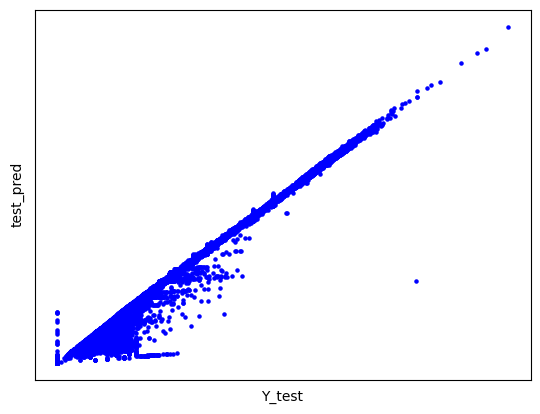

In [ ]:
plt.scatter(Y_test,test_pred, color="blue",s=5)
#plt.plot(X_test, test_pred, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())
plt.xlabel("Y_test")
plt.ylabel("test_pred")

plt.show()

### Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor(max_depth=4)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  11.112310436208949
RMSE TestData =  11.02547665233187
--------------------------------------------------
RSquared value on train: 0.9848098496561968
RSquared value on test: 0.9849973463786637


/tmp/ipykernel_221/2009900563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_221/2009900563.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_preds, hist=False, color="b", label="Fitted Values" , ax

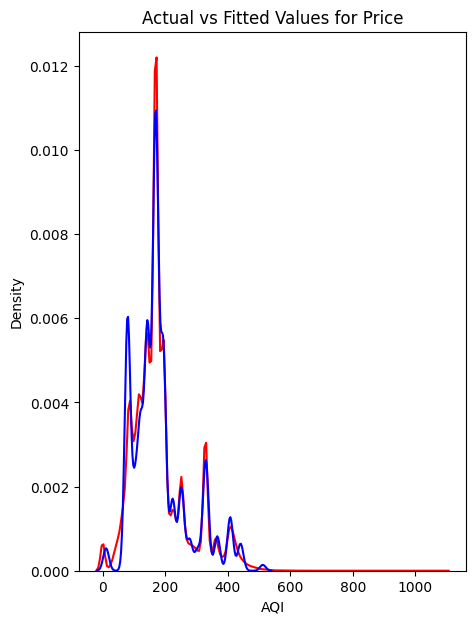

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(test_preds, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

[Text(0.5, 0.9, 'X[3] <= 238.85\nsquared_error = 8129.178\nsamples = 348588\nvalue = 182.981'),
 Text(0.25, 0.7, 'X[3] <= 131.9\nsquared_error = 2111.522\nsamples = 278487\nvalue = 145.445'),
 Text(0.125, 0.5, 'X[3] <= 92.12\nsquared_error = 928.553\nsamples = 92564\nvalue = 91.653'),
 Text(0.0625, 0.3, 'X[3] <= 0.5\nsquared_error = 825.834\nsamples = 52433\nvalue = 74.147'),
 Text(0.03125, 0.1, 'squared_error = 1374.175\nsamples = 4209\nvalue = 10.818'),
 Text(0.09375, 0.1, 'squared_error = 397.38\nsamples = 48224\nvalue = 79.674'),
 Text(0.1875, 0.3, 'X[3] <= 111.9\nsquared_error = 139.2\nsamples = 40131\nvalue = 114.525'),
 Text(0.15625, 0.1, 'squared_error = 74.726\nsamples = 14723\nvalue = 103.153'),
 Text(0.21875, 0.1, 'squared_error = 58.195\nsamples = 25408\nvalue = 121.115'),
 Text(0.375, 0.5, 'X[3] <= 180.61\nsquared_error = 542.633\nsamples = 185923\nvalue = 172.226'),
 Text(0.3125, 0.3, 'X[3] <= 156.111\nsquared_error = 195.514\nsamples = 131411\nvalue = 160.366'),
 Text(0.

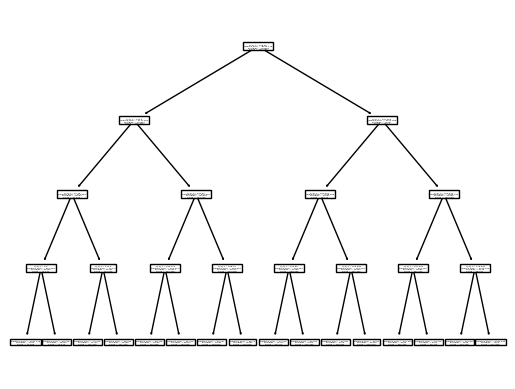

In [ ]:
from sklearn import tree
tree.plot_tree(DT)

### Random Forest Regressor

In [ ]:
RF=RandomForestRegressor(max_depth=4).fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  10.966665652417301
RMSE TestData =  10.876980822791841
--------------------------------------------------
RSquared value on train: 0.9852054231705486
RSquared value on test: 0.9853987492152826


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_preds1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_preds1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))

Mean Absolute Error: 6.273734759746899
Mean Squared Error: 118.3087118193815
Root Mean Squared Error: 10.876980822791841


/tmp/ipykernel_221/3366955781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_221/3366955781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_preds1, hist=False, color="b", label="Fitted Values" , a

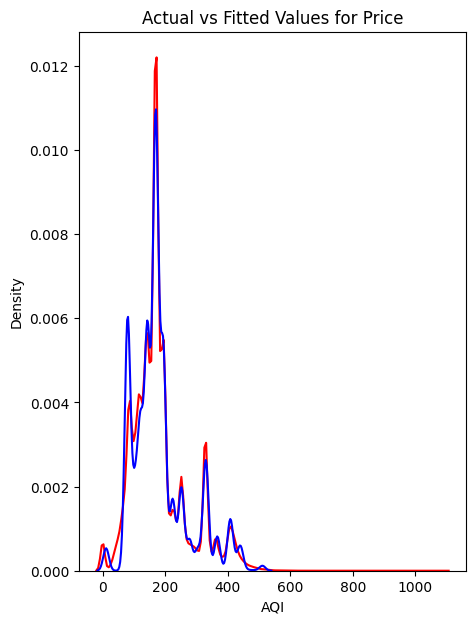

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(test_preds1, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [ ]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_depth=3, max_features='auto')

In [ ]:
from sklearn import tree

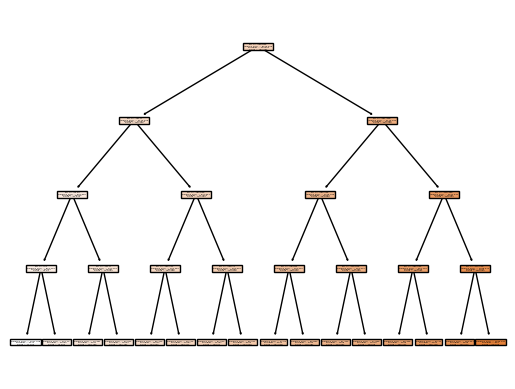

In [ ]:
import sklearn as sk
_ = sk.tree.plot_tree(RF.estimators_[0], feature_names=X.columns, filled=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6920ec3-e3dd-466f-8f01-821cfb33c0ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>